IE5374 17529 ST: Foundations Data Analytics (Group 33)

Project 1 (Task 1)

In [ ]:
!pip install validclust

In [40]:
#Importing all the library required for the project 
from google.colab import files
import pandas as pd
import plotly.express as px
from sklearn.cluster import KMeans
from sklearn import metrics
import scipy.cluster.hierarchy as shc 
import matplotlib.pyplot as plt
from sklearn.cluster import AgglomerativeClustering
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler,normalize
from validclust import dunn
from sklearn.metrics import pairwise_distances
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm
import numpy as np

In [3]:
#Uploading all the required files 
uploaded = files.upload()

Saving World Indicators.csv to World Indicators.csv
Saving Data8.csv to Data8.csv
Saving Data7.csv to Data7.csv
Saving Data6.csv to Data6.csv
Saving Data5.csv to Data5.csv
Saving Data4.csv to Data4.csv
Saving Data2.csv to Data2.csv
Saving Data3.csv to Data3.csv
Saving Data1.csv to Data1.csv


In [41]:
#Creating dataframes for given data files 
df_1= pd.read_csv('Data1.csv')
df_2= pd.read_csv('Data2.csv')
df_3= pd.read_csv('Data3.csv')
df_4= pd.read_csv('Data4.csv')
df_5= pd.read_csv('Data5.csv')
df_6= pd.read_csv('Data6.csv')
df_7= pd.read_csv('Data7.csv')
df_8= pd.read_csv('Data8.csv')
df_world_indicators=pd.read_csv('World Indicators.csv')

DATA 1

In [42]:
df_1

,Unnamed: 0,X1,X2,X3,Class
0,1,-0.063274,0.027734,0.022683,1
1,2,-0.000731,0.048211,0.069198,1
2,3,-0.060767,-0.009080,0.053085,1
3,4,0.013252,-0.011876,0.055324,1
4,5,-0.054508,-0.003813,0.001738,1
...,...,...,...,...,...
207,208,0.175738,-0.053478,-2.733752,7
208,209,0.396046,-0.858377,-3.126866,7
209,210,-0.406362,-0.334541,-2.885598,7
210,211,-0.299275,0.071281,-3.642585,7


In [43]:
#Initialling classes from 0 
df_1.Class.replace({1:0,2:1,3:2,4:3,5:4,6:5,7:6},inplace=True)
df_1

,Unnamed: 0,X1,X2,X3,Class
0,1,-0.063274,0.027734,0.022683,0
1,2,-0.000731,0.048211,0.069198,0
2,3,-0.060767,-0.009080,0.053085,0
3,4,0.013252,-0.011876,0.055324,0
4,5,-0.054508,-0.003813,0.001738,0
...,...,...,...,...,...
207,208,0.175738,-0.053478,-2.733752,6
208,209,0.396046,-0.858377,-3.126866,6
209,210,-0.406362,-0.334541,-2.885598,6
210,211,-0.299275,0.071281,-3.642585,6


In [44]:
#Plotting graph for original clusters of Data
fig = px.scatter_3d(df_1, x='X1', y='X2', z='X3',color='Class',title="Original Clusters of Data")
fig.show()

KMeans Clustering

In [45]:
#KMeans Model
model_k=KMeans(n_clusters=7,random_state=28)
model_k.fit(df_1.iloc[:,1:4])

KMeans(n_clusters=7, random_state=28)

In [46]:
df_1["KMeans Predicted Class"]=model_k.labels_

In [47]:
#Plotting graph for predicted clusters of Data
fig = px.scatter_3d(df_1, x='X1', y='X2', z='X3',color='KMeans Predicted Class',title="Predicted Clusters of Data")
fig.show()

Hierarchical Clustering

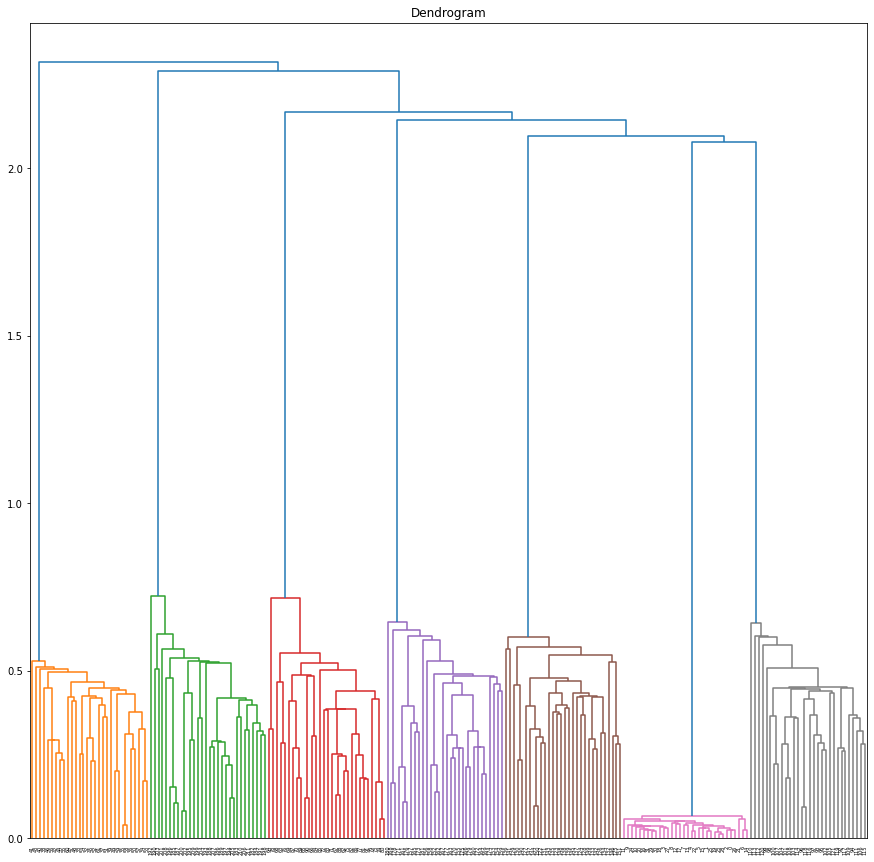

In [48]:
# Dendrogram
plt.figure(figsize=(15,15))  
plt.title("Dendrogram")  
dendrogram=shc.dendrogram(shc.linkage(df_1.iloc[:,1:4],method='single'))

In [49]:
#Agglomerative Clustering
model_h=AgglomerativeClustering(n_clusters=7, linkage='average')  
model_h.fit(df_1.iloc[:,1:4])

AgglomerativeClustering(linkage='average', n_clusters=7)

In [50]:
df_1["Hierarchical Predicted Class"]=model_h.labels_

In [51]:
#Plotting graph for predicted clusters of Data
fig = px.scatter_3d(df_1, x='X1', y='X2', z='X3',color='Hierarchical Predicted Class',title="Predicted Clusters of Data")
fig.show()

Evaluation: Accuracy score and f_1 score 

In [52]:
print("KMeans Prediction Accuracy Score:",metrics.accuracy_score(df_1.Class,model_k.labels_))
print("KMeans Prediction F_1 Score:",metrics.f1_score(df_1.Class,model_k.labels_,average=None))
print("Hierarchical Prediction Accuracy Score:",metrics.accuracy_score(df_1.Class,model_h.labels_))
print("Hierarchical Prediction F_1 Score:",metrics.f1_score(df_1.Class,model_h.labels_,average=None))

KMeans Prediction Accuracy Score: 0.4339622641509434
KMeans Prediction F_1 Score: [1. 0. 0. 0. 1. 1. 0.]
Hierarchical Prediction Accuracy Score: 0.14150943396226415
Hierarchical Prediction F_1 Score: [0. 0. 0. 1. 0. 0. 0.]


DATA 2

In [53]:
df_2

,Unnamed: 0,X,Y,C,Class
0,X1,3.277701,0.814082,0.326574,1
1,X2,0.387577,0.176780,0.888046,1
2,X3,0.268546,0.582963,0.080981,1
3,X4,2.031145,0.244597,0.643921,1
4,X5,0.188677,0.461280,0.496633,1
...,...,...,...,...,...
399,X400,3.248655,2.297291,3.388138,3
400,X,4.100000,5.100000,0.504558,4
401,X.1,3.900000,4.900000,0.941634,4
402,X.2,4.000000,5.000000,0.702123,4


In [54]:
#Initialling classes from 0 
df_2.Class.replace({1:0,2:1,3:2,4:3},inplace=True)
df_2

,Unnamed: 0,X,Y,C,Class
0,X1,3.277701,0.814082,0.326574,0
1,X2,0.387577,0.176780,0.888046,0
2,X3,0.268546,0.582963,0.080981,0
3,X4,2.031145,0.244597,0.643921,0
4,X5,0.188677,0.461280,0.496633,0
...,...,...,...,...,...
399,X400,3.248655,2.297291,3.388138,2
400,X,4.100000,5.100000,0.504558,3
401,X.1,3.900000,4.900000,0.941634,3
402,X.2,4.000000,5.000000,0.702123,3


In [55]:
#Plotting graph for original clusters of Data
fig = px.scatter_3d(df_2, x='X', y='Y', z='C',color='Class',title="Original Clusters of Data")
fig.show()

KMeans Clustering

In [56]:
#KMeans Model
model_k=KMeans(n_clusters=4,random_state=10)
model_k.fit(df_2.iloc[:,1:4])

KMeans(n_clusters=4, random_state=10)

In [57]:
df_2["KMeans Predicted Class"]=model_k.labels_

In [58]:
#Plotting graph for predicted clusters of Data
fig = px.scatter_3d(df_2, x='X', y='Y', z='C',color='KMeans Predicted Class',title="Predicted Clusters of Data")
fig.show()

Hierarchical Clustering

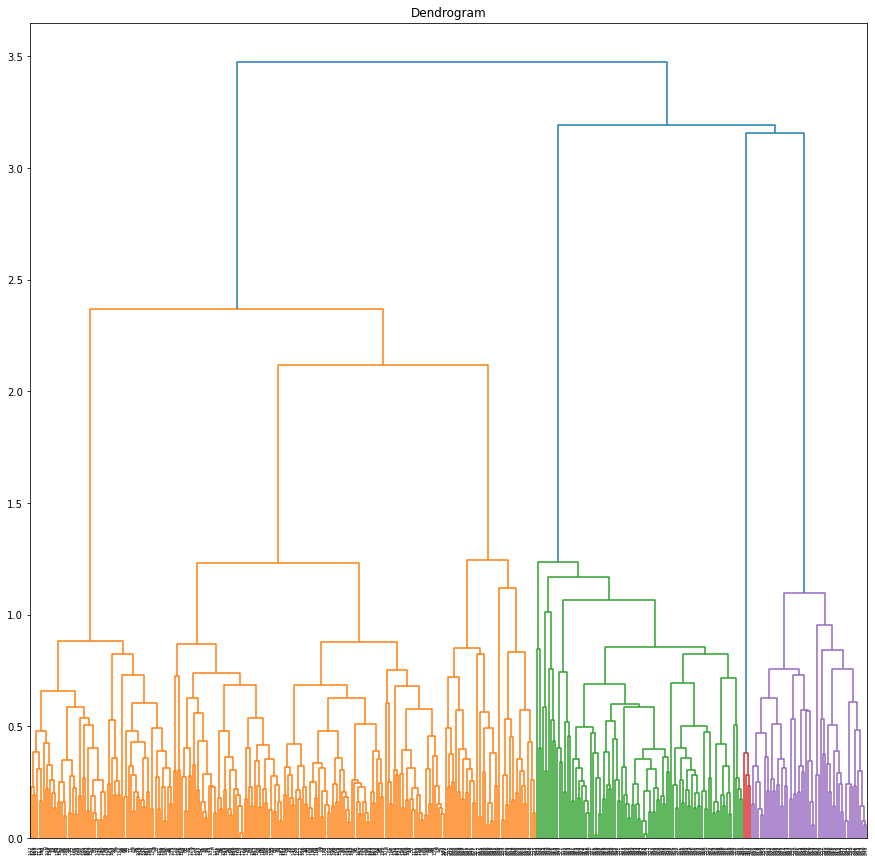

In [59]:
# Dendrogram
plt.figure(figsize=(15,15))  
plt.title("Dendrogram")  
dendrogram=shc.dendrogram(shc.linkage(df_2.iloc[:,1:4],method='average'))

In [60]:
#Agglomerative Clustering
model_h=AgglomerativeClustering(n_clusters=4, linkage='average')  
model_h.fit(df_2.iloc[:,1:4])

AgglomerativeClustering(linkage='average', n_clusters=4)

In [61]:
df_2["Hierarchical Predicted Class"]=model_h.labels_

In [62]:
#Plotting graph for predicted clusters of Data
fig = px.scatter_3d(df_2, x='X', y='Y', z='C',color='Hierarchical Predicted Class',title="Predicted Clusters of Data")
fig.show()

Evaluation: Accuracy score and f_1 score 

In [63]:
print("KMeans Prediction Accuracy Score:",metrics.accuracy_score(df_2.Class,model_k.labels_))
print("KMeans Prediction F_1 Score:",metrics.f1_score(df_2.Class,model_k.labels_,average=None))
print("Hierarchical Prediction Accuracy Score:",metrics.accuracy_score(df_2.Class,model_h.labels_))
print("Hierarchical Prediction F_1 Score:",metrics.f1_score(df_2.Class,model_h.labels_,average=None))

KMeans Prediction Accuracy Score: 0.7252475247524752
KMeans Prediction F_1 Score: [0.68621701 0.84444444 1.         0.        ]
Hierarchical Prediction Accuracy Score: 0.8910891089108911
Hierarchical Prediction F_1 Score: [0.9009009  0.71794872 1.         1.        ]


DATA 3

In [65]:
df_3

,Unnamed: 0,X1,X2,X3,Class
0,1,1.295428,0.050829,-0.385217,1
1,2,1.409178,-0.035191,-0.251980,1
2,3,1.096803,0.246365,-0.415011,1
3,4,1.463328,0.265354,-0.513488,1
4,5,1.603284,0.080577,-0.470257,1
...,...,...,...,...,...
395,396,0.795695,0.209456,1.880609,4
396,397,0.653127,-0.703156,1.549448,4
397,398,-0.726249,-0.103244,0.694300,4
398,399,0.808596,-0.492640,1.649370,4


In [66]:
#Initialling classes from 0 
df_3.Class.replace({1:0,2:1,3:2,4:3},inplace=True)
df_3

,Unnamed: 0,X1,X2,X3,Class
0,1,1.295428,0.050829,-0.385217,0
1,2,1.409178,-0.035191,-0.251980,0
2,3,1.096803,0.246365,-0.415011,0
3,4,1.463328,0.265354,-0.513488,0
4,5,1.603284,0.080577,-0.470257,0
...,...,...,...,...,...
395,396,0.795695,0.209456,1.880609,3
396,397,0.653127,-0.703156,1.549448,3
397,398,-0.726249,-0.103244,0.694300,3
398,399,0.808596,-0.492640,1.649370,3


In [67]:
#Plotting graph for original clusters of Data
fig = px.scatter_3d(df_3, x='X1', y='X2', z='X3',color='Class',title="Original Clusters of Data")
fig.show()

KMeans Clustering

In [68]:
#KMeans Model
model_k=KMeans(n_clusters=4,random_state=1)
model_k.fit(df_3.iloc[:,1:4])

KMeans(n_clusters=4, random_state=1)

In [69]:
df_3["KMeans Predicted Class"]=model_k.labels_

In [70]:
#Plotting graph for predicted clusters of Data
fig = px.scatter_3d(df_3, x='X1', y='X2', z='X3',color='KMeans Predicted Class',title="Predicted Clusters of Data")
fig.show()

Hierarchical Clustering

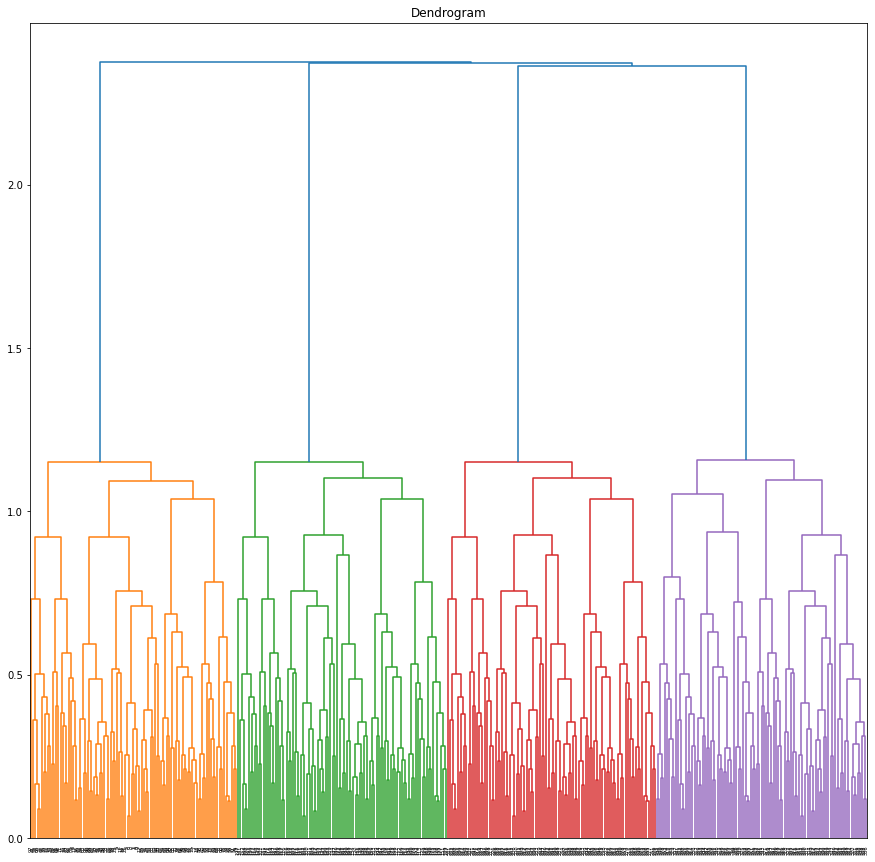

In [71]:
# Dendrogram
plt.figure(figsize=(15,15))  
plt.title("Dendrogram")  
dendrogram=shc.dendrogram(shc.linkage(df_3.iloc[:,1:4],method='average'))

In [72]:
#Agglomerative Clustering
model_h=AgglomerativeClustering(n_clusters=4, linkage='average')  
model_h.fit(df_3.iloc[:,1:4])

AgglomerativeClustering(linkage='average', n_clusters=4)

In [73]:
df_3["Hierarchical Predicted Class"]=model_h.labels_

In [74]:
#Plotting graph for predicted clusters of Data
fig = px.scatter_3d(df_3, x='X1', y='X2', z='X3',color='Hierarchical Predicted Class',title="Predicted Clusters of Data")
fig.show()

Evaluation: Accuracy score and f_1 score

In [75]:
print("KMeans Prediction Accuracy Score:",metrics.accuracy_score(df_3.Class,model_k.labels_))
print("KMeans Prediction F_1 Score:",metrics.f1_score(df_3.Class,model_k.labels_,average=None))
print("Hierarchical Prediction Accuracy Score:",metrics.accuracy_score(df_3.Class,model_h.labels_))
print("Hierarchical Prediction F_1 Score:",metrics.f1_score(df_3.Class,model_h.labels_,average=None))

KMeans Prediction Accuracy Score: 0.25
KMeans Prediction F_1 Score: [1. 0. 0. 0.]
Hierarchical Prediction Accuracy Score: 0.0025
Hierarchical Prediction F_1 Score: [0.00995025 0.         0.         0.        ]


DATA 4

In [77]:
df_4

,Unnamed: 0,X1,X2,X3,Class
0,1,-0.45300,-0.8910,0.02300,1
1,2,0.65300,-0.8460,0.02110,1
2,3,0.39800,0.9130,-0.00139,1
3,4,0.09520,1.0500,0.00628,1
4,5,0.52400,-0.9410,0.03780,1
...,...,...,...,...,...
995,996,0.01520,0.0531,-0.36100,2
996,997,0.05160,0.6910,0.87500,2
997,998,-0.00511,1.3900,-0.94700,2
998,999,-0.06710,0.7140,0.88100,2


In [78]:
#Initialling classes from 0 
df_4.Class.replace({1:0,2:1},inplace=True)
df_4

,Unnamed: 0,X1,X2,X3,Class
0,1,-0.45300,-0.8910,0.02300,0
1,2,0.65300,-0.8460,0.02110,0
2,3,0.39800,0.9130,-0.00139,0
3,4,0.09520,1.0500,0.00628,0
4,5,0.52400,-0.9410,0.03780,0
...,...,...,...,...,...
995,996,0.01520,0.0531,-0.36100,1
996,997,0.05160,0.6910,0.87500,1
997,998,-0.00511,1.3900,-0.94700,1
998,999,-0.06710,0.7140,0.88100,1


In [79]:
#Plotting graph for original clusters of Data
fig = px.scatter_3d(df_4, x='X1', y='X2', z='X3',color='Class',title="Original Clusters of Data")
fig.show()

KMeans Clustering

In [80]:
#KMeans Model
model_k=KMeans(n_clusters=2,random_state=5)
model_k.fit(df_4.iloc[:,1:4])

KMeans(n_clusters=2, random_state=5)

In [81]:
df_4["KMeans Predicted Class"]=model_k.labels_

In [82]:
#Plotting graph for predicted clusters of Data
fig = px.scatter_3d(df_4, x='X1', y='X2', z='X3',color='KMeans Predicted Class',title="Predicted Clusters of Data")
fig.show()

Hierarchical Clustering

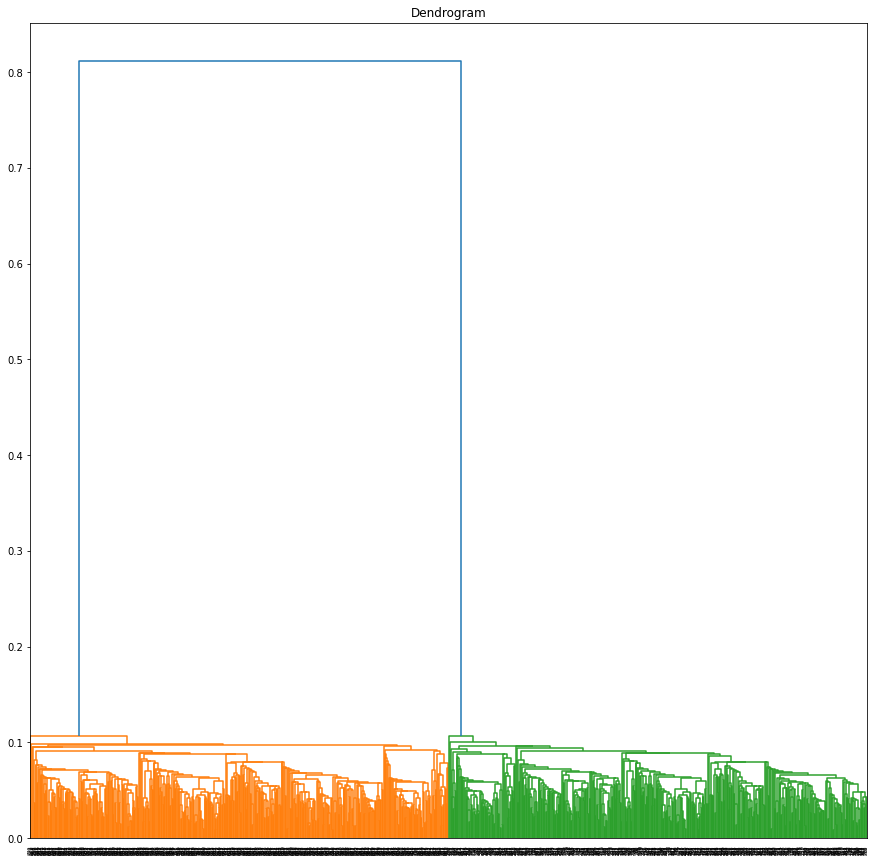

In [83]:
# Dendrogram
plt.figure(figsize=(15,15))  
plt.title("Dendrogram")  
dendrogram=shc.dendrogram(shc.linkage(df_4.iloc[:,1:4],method='single'))

In [84]:
#Agglomerative Clustering
model_h=AgglomerativeClustering(n_clusters=2, linkage='single')  
model_h.fit(df_4.iloc[:,1:4])

AgglomerativeClustering(linkage='single')

In [85]:
df_4["Hierarchical Predicted Class"]=model_h.labels_

In [150]:
#Plotting graph for predicted clusters of Data
fig = px.scatter_3d(df_4, x='X1', y='X2', z='X3',color='Hierarchical Predicted Class',title="Predicted Clusters of Data")
fig.show()

Evaluation: Accuracy score and f_1 score



In [87]:
print("KMeans Prediction Accuracy Score:",metrics.accuracy_score(df_4.Class,model_k.labels_))
print("KMeans Prediction F_1 Score:",metrics.f1_score(df_4.Class,model_k.labels_,average=None))
print("Hierarchical Prediction Accuracy Score:",metrics.accuracy_score(df_4.Class,model_h.labels_))
print("Hierarchical Prediction F_1 Score:",metrics.f1_score(df_4.Class,model_h.labels_,average=None))

KMeans Prediction Accuracy Score: 0.653
KMeans Prediction F_1 Score: [0.65334665 0.65265265]
Hierarchical Prediction Accuracy Score: 1.0
Hierarchical Prediction F_1 Score: [1. 1.]


DATA 5

In [88]:
df_5

,Unnamed: 0,X1,X2,X3,Class
0,1,-4.822490,-50.402170,4.020861,1
1,2,-44.460120,20.964670,-11.492060,1
2,3,50.001020,0.780748,9.134460,1
3,4,-41.699080,-22.310060,16.314120,1
4,5,4.425242,-4.666664,50.223740,1
...,...,...,...,...,...
795,796,-1.531027,0.681636,0.543271,2
796,797,0.500754,-1.848209,0.605654,2
797,798,1.089574,-0.246493,-3.355758,2
798,799,-1.907717,4.964502,2.098423,2


In [89]:
#Initialling classes from 0 
df_5.Class.replace({1:0,2:1},inplace=True)
df_5

,Unnamed: 0,X1,X2,X3,Class
0,1,-4.822490,-50.402170,4.020861,0
1,2,-44.460120,20.964670,-11.492060,0
2,3,50.001020,0.780748,9.134460,0
3,4,-41.699080,-22.310060,16.314120,0
4,5,4.425242,-4.666664,50.223740,0
...,...,...,...,...,...
795,796,-1.531027,0.681636,0.543271,1
796,797,0.500754,-1.848209,0.605654,1
797,798,1.089574,-0.246493,-3.355758,1
798,799,-1.907717,4.964502,2.098423,1


In [90]:
#Plotting graph for original clusters of Data
fig = px.scatter_3d(df_5, x='X1', y='X2', z='X3',color='Class',title="Original Clusters of Data")
fig.show()

KMeans Clustering

In [91]:
#KMeans Model
model_k=KMeans(n_clusters=2,random_state=1)
model_k.fit(df_5.iloc[:,1:4])

KMeans(n_clusters=2, random_state=1)

In [92]:
df_5["KMeans Predicted Class"]=model_k.labels_

In [93]:
#Plotting graph for predicted clusters of Data
fig = px.scatter_3d(df_5, x='X1', y='X2', z='X3',color='KMeans Predicted Class',title="Predicted Clusters of Data")
fig.show()

Hierarchical Clustering

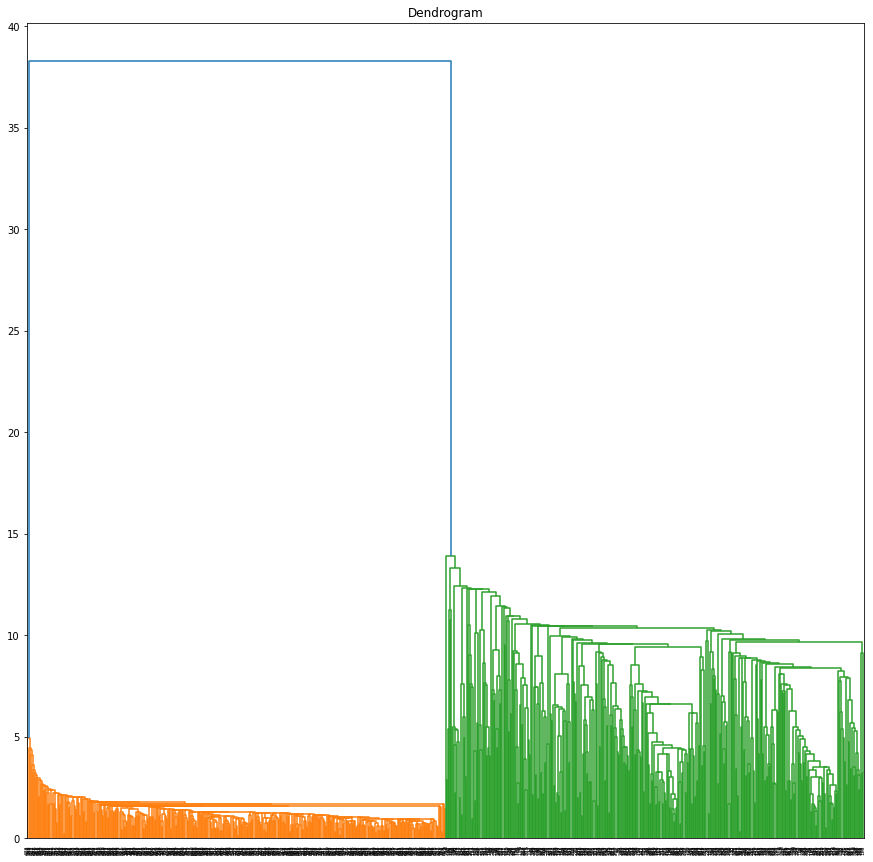

In [94]:
# Dendrogram
plt.figure(figsize=(15,15))  
plt.title("Dendrogram")  
dendrogram=shc.dendrogram(shc.linkage(df_5.iloc[:,1:4],method='single'))

In [95]:
#Agglomerative Clustering
model_h=AgglomerativeClustering(n_clusters=2, linkage='single')  
model_h.fit(df_5.iloc[:,1:4])

AgglomerativeClustering(linkage='single')

In [96]:
df_5["Hierarchical Predicted Class"]=model_h.labels_

In [151]:
#Plotting graph for predicted clusters of Data
fig = px.scatter_3d(df_5, x='X1', y='X2', z='X3',color='Hierarchical Predicted Class',title="Predicted Clusters of Data")
fig.show()

Evaluation: Accuracy score and f_1 score

In [98]:
print("KMeans Prediction Accuracy Score:",metrics.accuracy_score(df_5.Class,model_k.labels_))
print("KMeans Prediction F_1 Score:",metrics.f1_score(df_5.Class,model_k.labels_,average=None))
print("Hierarchical Prediction Accuracy Score:",metrics.accuracy_score(df_5.Class,model_h.labels_))
print("Hierarchical Prediction F_1 Score:",metrics.f1_score(df_5.Class,model_h.labels_,average=None))

KMeans Prediction Accuracy Score: 0.7175
KMeans Prediction F_1 Score: [0.60627178 0.7797271 ]
Hierarchical Prediction Accuracy Score: 1.0
Hierarchical Prediction F_1 Score: [1. 1.]


DATA 6

In [99]:
df_6

,Unnamed: 0,X1,X2,Class
0,1,1.388261,2.076096,1
1,2,2.177247,3.102304,1
2,3,0.378645,5.307610,1
3,4,3.681732,1.622681,1
4,5,2.462861,2.777897,1
...,...,...,...,...
4091,4092,0.909687,0.375763,2
4092,4093,2.698381,0.511262,2
4093,4094,1.078797,1.526153,2
4094,4095,1.974889,-0.649343,2


In [100]:
#Initialling classes from 0 
df_6.Class.replace({1:0,2:1},inplace=True)
df_6

,Unnamed: 0,X1,X2,Class
0,1,1.388261,2.076096,0
1,2,2.177247,3.102304,0
2,3,0.378645,5.307610,0
3,4,3.681732,1.622681,0
4,5,2.462861,2.777897,0
...,...,...,...,...
4091,4092,0.909687,0.375763,1
4092,4093,2.698381,0.511262,1
4093,4094,1.078797,1.526153,1
4094,4095,1.974889,-0.649343,1


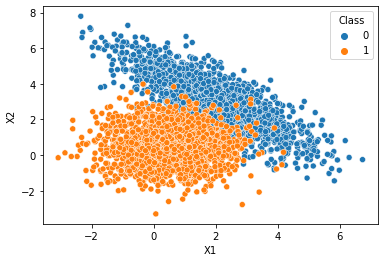

In [101]:
#Plotting graph for original clusters of Data
sns.scatterplot(x='X1', y='X2', data=df_6,hue='Class')

KMeans Clustering

In [102]:
#KMeans Model
model_k=KMeans(n_clusters=2,random_state=1)
model_k.fit(df_6.iloc[:,1:3])

KMeans(n_clusters=2, random_state=1)

In [103]:
df_6["KMeans Predicted Class"]=model_k.labels_

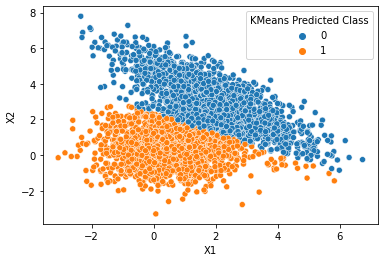

In [104]:
#Plotting graph for predicted clusters of Data
sns.scatterplot(x='X1', y='X2', data=df_6,hue='KMeans Predicted Class')

Hierarchical Clustering

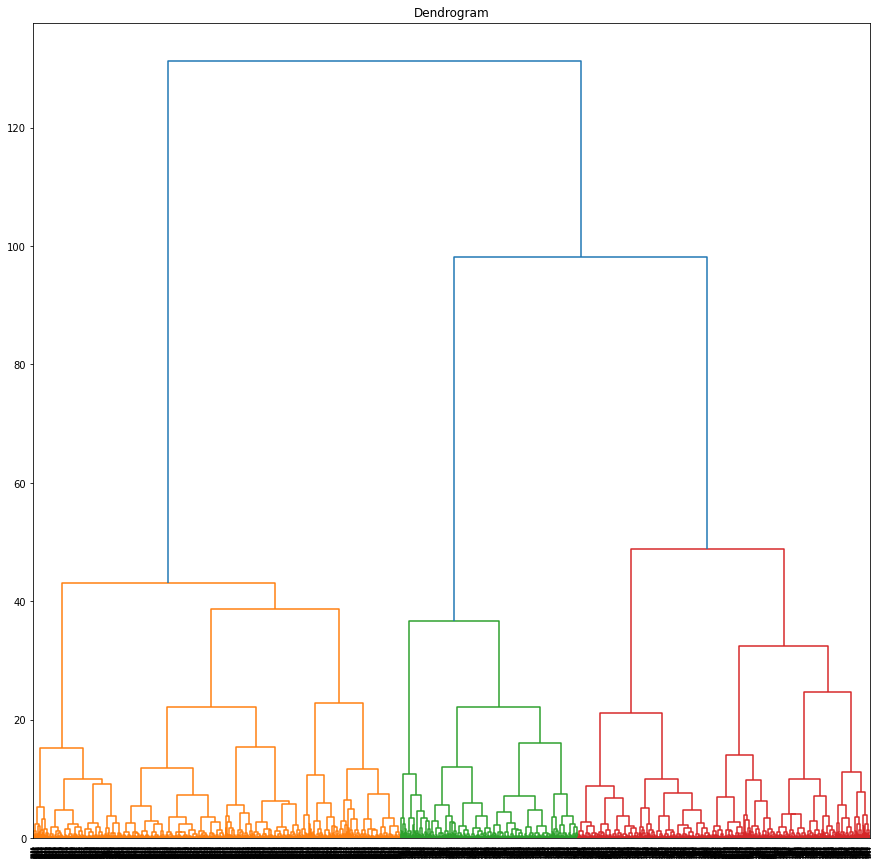

In [105]:
# Dendrogram
plt.figure(figsize=(15,15))  
plt.title("Dendrogram")  
dendrogram=shc.dendrogram(shc.linkage(df_6.iloc[:,1:3],method='ward'))

In [106]:
#Agglomerative Clustering
model_h=AgglomerativeClustering(n_clusters=2, linkage='ward')  
model_h.fit(df_6.iloc[:,1:3])

AgglomerativeClustering()

In [107]:
df_6["Hierarchical Predicted Class"]=model_h.labels_

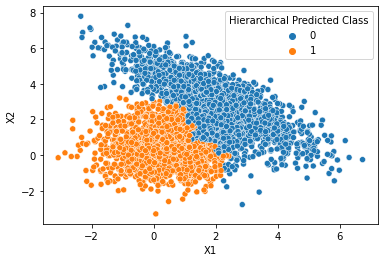

In [108]:
#Plotting graph for predicted clusters of Data
sns.scatterplot(x='X1', y='X2', data=df_6,hue='Hierarchical Predicted Class')

Evaluation: Accuracy score and f_1 score

In [109]:
print("KMeans Prediction Accuracy Score:",metrics.accuracy_score(df_6.Class,model_k.labels_))
print("KMeans Prediction F_1 Score:",metrics.f1_score(df_6.Class,model_k.labels_,average=None))
print("Hierarchical Prediction Accuracy Score:",metrics.accuracy_score(df_6.Class,model_h.labels_))
print("Hierarchical Prediction F_1 Score:",metrics.f1_score(df_6.Class,model_h.labels_,average=None))

KMeans Prediction Accuracy Score: 0.951416015625
KMeans Prediction F_1 Score: [0.95265287 0.95011281]
Hierarchical Prediction Accuracy Score: 0.923828125
Hierarchical Prediction F_1 Score: [0.9281768  0.91891892]


DATA 7

In [110]:
df_7

,Unnamed: 0,X1,X2,Class
0,1,-3.000000,-3.000000,5
1,2,-3.000000,3.000000,4
2,3,3.000000,-3.000000,6
3,4,3.000000,3.000000,3
4,5,-0.417091,0.114782,1
...,...,...,...,...
765,766,-1.604434,-1.118861,2
766,767,-3.050000,-3.050000,5
767,768,-3.050000,2.950000,4
768,769,2.950000,-3.050000,6


In [111]:
#Initialling classes from 0 
df_7.Class.replace({1:0,2:1,3:2,4:3,5:4,6:5},inplace=True)
df_7

,Unnamed: 0,X1,X2,Class
0,1,-3.000000,-3.000000,4
1,2,-3.000000,3.000000,3
2,3,3.000000,-3.000000,5
3,4,3.000000,3.000000,2
4,5,-0.417091,0.114782,0
...,...,...,...,...
765,766,-1.604434,-1.118861,1
766,767,-3.050000,-3.050000,4
767,768,-3.050000,2.950000,3
768,769,2.950000,-3.050000,5


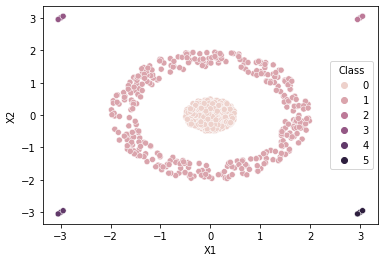

In [112]:
#Plotting graph for original clusters of Data
sns.scatterplot(x='X1', y='X2', data=df_7,hue='Class')

KMeans Clustering

In [113]:
#KMeans Model
model_k=KMeans(n_clusters=6,random_state=2)
model_k.fit(df_7.iloc[:,1:3])

KMeans(n_clusters=6, random_state=2)

In [114]:
df_7["KMeans Predicted Class"]=model_k.labels_

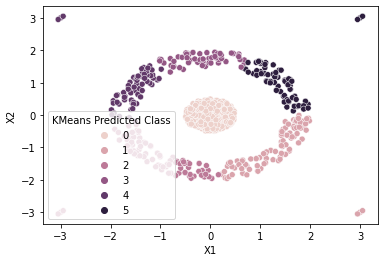

In [115]:
#Plotting graph for predicted clusters of Data
sns.scatterplot(x='X1', y='X2', data=df_7,hue='KMeans Predicted Class')

Hierarchical Clustering

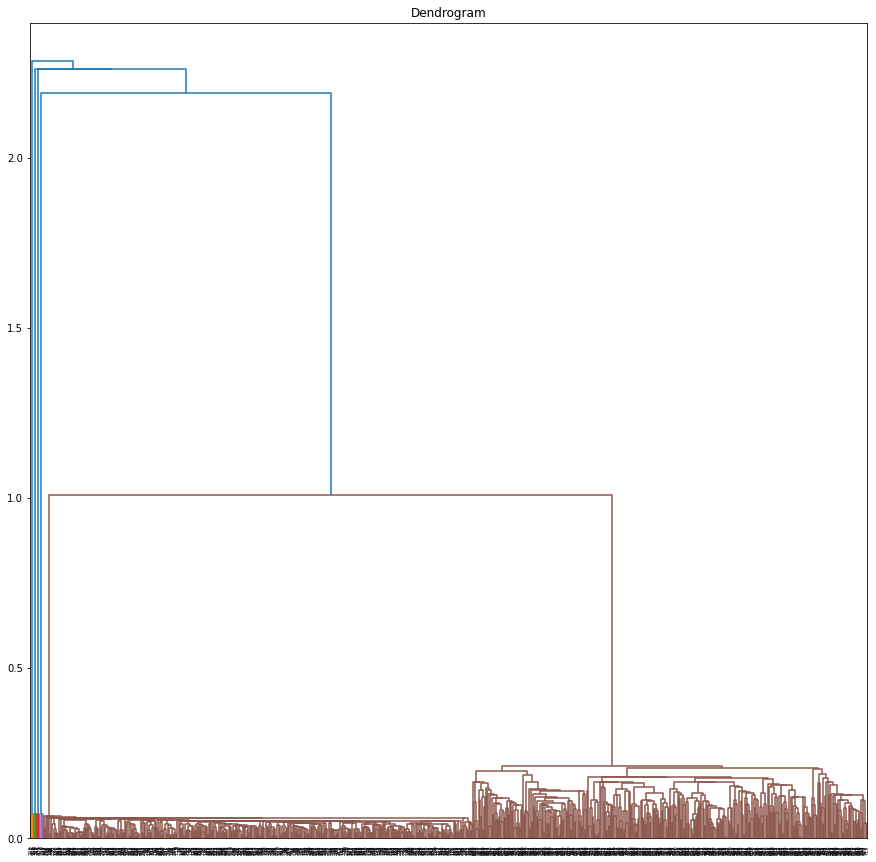

In [116]:
# Dendrogram
plt.figure(figsize=(15,15))  
plt.title("Dendrogram")  
dendrogram=shc.dendrogram(shc.linkage(df_7.iloc[:,1:3],method='single'))

In [117]:
#Agglomerative Clustering
model_h=AgglomerativeClustering(n_clusters=6, linkage='single')  
model_h.fit(df_7.iloc[:,1:3])

AgglomerativeClustering(linkage='single', n_clusters=6)

In [118]:
df_7["Hierarchical Predicted Class"]=model_h.labels_

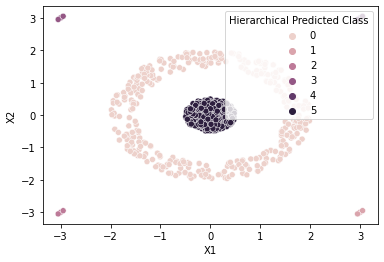

In [119]:
#Plotting graph for predicted clusters of Data
sns.scatterplot(x='X1', y='X2', data=df_7,hue='Hierarchical Predicted Class')

Evaluation: Accuracy score and f_1 score

In [120]:
print("KMeans Prediction Accuracy Score:",metrics.accuracy_score(df_7.Class,model_k.labels_))
print("KMeans Prediction F_1 Score:",metrics.f1_score(df_7.Class,model_k.labels_,average=None))
print("Hierarchical Prediction Accuracy Score:",metrics.accuracy_score(df_7.Class,model_h.labels_))
print("Hierarchical Prediction F_1 Score:",metrics.f1_score(df_7.Class,model_h.labels_,average=None))

KMeans Prediction Accuracy Score: 0.6311688311688312
KMeans Prediction F_1 Score: [1.         0.39824945 0.         0.         0.         0.        ]
Hierarchical Prediction Accuracy Score: 0.003896103896103896
Hierarchical Prediction F_1 Score: [0. 0. 0. 1. 0. 0.]


DATA 8

In [121]:
df_8

,Unnamed: 0,X1,X2,X3,Class
0,1,0.000000,0.000000,1.00000,1
1,2,0.000000,0.052336,0.99863,1
2,3,0.049774,0.016173,0.99863,1
3,4,0.030762,-0.042341,0.99863,1
4,5,-0.030762,-0.042341,0.99863,1
...,...,...,...,...,...
3997,3998,0.049774,-0.016173,-0.99863,1
3998,3999,0.000000,-0.052336,-0.99863,1
3999,4000,-0.049774,-0.016173,-0.99863,1
4000,4001,-0.030762,0.042341,-0.99863,1


In [122]:
#Initialling classes from 0 
df_8.Class.replace({1:0},inplace=True)
df_8

,Unnamed: 0,X1,X2,X3,Class
0,1,0.000000,0.000000,1.00000,0
1,2,0.000000,0.052336,0.99863,0
2,3,0.049774,0.016173,0.99863,0
3,4,0.030762,-0.042341,0.99863,0
4,5,-0.030762,-0.042341,0.99863,0
...,...,...,...,...,...
3997,3998,0.049774,-0.016173,-0.99863,0
3998,3999,0.000000,-0.052336,-0.99863,0
3999,4000,-0.049774,-0.016173,-0.99863,0
4000,4001,-0.030762,0.042341,-0.99863,0


In [123]:
#Plotting graph for original clusters of Data
fig = px.scatter_3d(df_8, x='X1', y='X2', z='X3',color='Class',title="Original Clusters of Data")
fig.show()

KMeans Clustering

In [124]:
#KMeans Model
model_k=KMeans(n_clusters=1)
model_k.fit(df_8.iloc[:,1:4])

KMeans(n_clusters=1)

In [125]:
df_8["KMeans Predicted Class"]=model_k.labels_

In [126]:
#Plotting graph for predicted clusters of Data
fig = px.scatter_3d(df_8, x='X1', y='X2', z='X3',color='KMeans Predicted Class',title="Predicted Clusters of Data")
fig.show()

Hierarchical Clustering

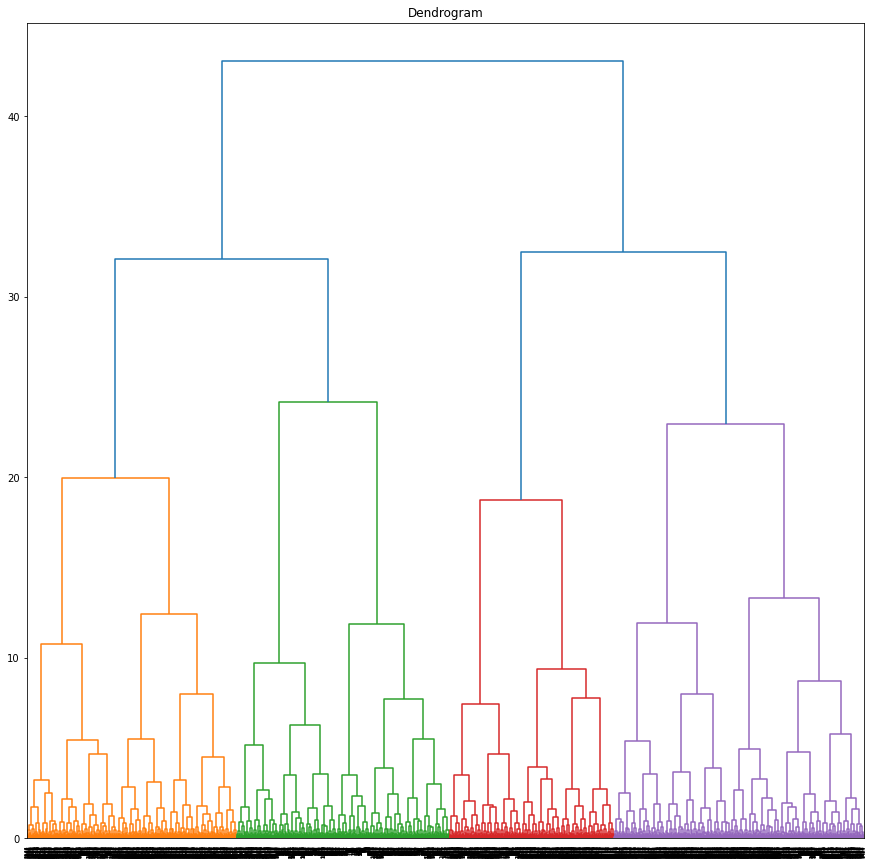

In [127]:
# Dendrogram
plt.figure(figsize=(15,15))  
plt.title("Dendrogram")  
dendrogram=shc.dendrogram(shc.linkage(df_8.iloc[:,1:4],method='ward'))

In [128]:
#Agglomerative Clustering
model_h=AgglomerativeClustering(n_clusters=1, linkage='ward')  
model_h.fit(df_8.iloc[:,1:4])

AgglomerativeClustering(n_clusters=1)

In [129]:
df_8["Hierarchical Predicted Class"]=model_h.labels_

In [152]:
#Plotting graph for predicted clusters of Data
fig = px.scatter_3d(df_8, x='X1', y='X2', z='X3',color='Hierarchical Predicted Class',title="Predicted Clusters of Data")
fig.show()

Evaluation: Accuracy score and f_1 score

In [131]:
print("KMeans Prediction Accuracy Score:",metrics.accuracy_score(df_8.Class,model_k.labels_))
print("KMeans Prediction F_1 Score:",metrics.f1_score(df_8.Class,model_k.labels_,average=None))
print("Hierarchical Prediction Accuracy Score:",metrics.accuracy_score(df_8.Class,model_h.labels_))
print("Hierarchical Prediction F_1 Score:",metrics.f1_score(df_8.Class,model_h.labels_,average=None))

KMeans Prediction Accuracy Score: 1.0
KMeans Prediction F_1 Score: [1.]
Hierarchical Prediction Accuracy Score: 1.0
Hierarchical Prediction F_1 Score: [1.]


Conclusion

We have used accuracy score and f_1 score for individual class in each dataset. The model assigned labels are completely different from the original labels in that case we converted the original labels to the model assigned labels for better scores. The accuracy score can not define the performance of the model through which clusters are made because it is a simple ratio between the original class and the predicted class. There are instances where the dendrogram suggested a different number for cluster than the original dataset.

Formula for f_1 score

F1 = 2 * (precision * recall) / (precision + recall)

Formula for accuracy score

Accuracy = TP+TN/TP+FP+FN+TN

TASK 2

In [132]:
df_temp=df_world_indicators

In [133]:
df_temp.describe()

,Birth Rate,Days to Start Business,Energy Usage,Health Exp % GDP,Hours to do Tax,Infant Mortality Rate,Internet Usage,Lending Interest,Life Expectancy Female,Life Expectancy Male,Mobile Phone Usage,Population 0-14,Population 15-64,Population 65+,Population Urban
count,199.000000,181.000000,1.360000e+02,185.000000,180.000000,188.000000,199.000000,131.000000,197.000000,197.000000,196.000000,191.000000,191.000000,191.000000,206.000000
mean,0.021759,30.331492,9.223794e+04,0.067362,279.283333,0.027340,0.376884,0.122588,72.746193,68.035533,0.958673,0.286963,0.635550,0.077424,0.576728
std,0.010721,56.584357,3.125758e+05,0.028462,247.783296,0.025358,0.284034,0.079495,10.091750,8.868297,0.431784,0.107775,0.071489,0.052995,0.244372
min,0.008000,1.000000,7.650000e+02,0.017000,12.000000,0.002000,0.000000,0.005000,45.000000,45.000000,0.000000,0.119000,0.475000,0.003000,0.089000
25%,0.012000,9.000000,5.699000e+03,0.047000,151.750000,0.007000,0.100000,0.074500,67.000000,62.000000,0.700000,0.189000,0.581000,0.034000,0.377750
50%,0.019000,18.000000,1.808200e+04,0.065000,224.000000,0.016000,0.400000,0.106000,76.000000,70.000000,1.000000,0.279000,0.654000,0.056000,0.571500
75%,0.028000,35.000000,5.155725e+04,0.085000,327.000000,0.042250,0.600000,0.150000,80.000000,75.000000,1.200000,0.382500,0.684500,0.118000,0.772500
max,0.050000,694.000000,2.727728e+06,0.177000,2600.000000,0.112000,0.900000,0.525000,87.000000,81.000000,2.500000,0.499000,0.857000,0.237000,1.000000


In [134]:
df_temp.isnull().sum()

Birth Rate                 9
Business Tax Rate         27
Days to Start Business    27
Energy Usage              72
GDP                       20
Health Exp % GDP          23
Health Exp/Capita         23
Hours to do Tax           28
Infant Mortality Rate     20
Internet Usage             9
Lending Interest          77
Life Expectancy Female    11
Life Expectancy Male      11
Mobile Phone Usage        12
Population 0-14           17
Population 15-64          17
Population 65+            17
Population Urban           2
Region                     0
Country                    0
dtype: int64

In [135]:
#Dropping columns [Energy Usage,Lending Interest] which contain maximum nulls
df_temp.drop(['Energy Usage','Lending Interest'],axis=1,inplace=True)

In [136]:
#Dropping the remaining null values of the dataset.
df_temp.dropna(inplace=True)

In [137]:
df_temp

,Birth Rate,Business Tax Rate,Days to Start Business,GDP,Health Exp % GDP,Health Exp/Capita,Hours to do Tax,Infant Mortality Rate,Internet Usage,Life Expectancy Female,Life Expectancy Male,Mobile Phone Usage,Population 0-14,Population 15-64,Population 65+,Population Urban,Region,Country
0,0.025,72.0%,25.0,"$199,070,864,638",0.044,$233,451.0,0.023,0.1,72.0,69.0,0.9,0.272,0.681,0.047,0.682,Africa,Algeria
1,0.046,52.1%,66.0,"$104,115,863,405",0.034,$178,282.0,0.107,0.1,53.0,50.0,0.5,0.477,0.499,0.024,0.409,Africa,Angola
2,0.037,65.9%,29.0,"$7,294,900,431",0.045,$34,270.0,0.060,0.0,60.0,58.0,0.8,0.432,0.539,0.029,0.423,Africa,Benin
3,0.024,19.5%,60.0,"$15,292,424,757",0.052,$404,152.0,0.039,0.1,46.0,47.0,1.5,0.340,0.625,0.035,0.565,Africa,Botswana
4,0.042,43.5%,13.0,"$10,395,757,480",0.064,$39,270.0,0.068,0.0,56.0,55.0,0.5,0.458,0.517,0.025,0.265,Africa,Burkina Faso
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
201,0.018,27.9%,694.0,"$4,363,219,094",0.060,$490,199.0,0.022,0.3,74.0,67.0,1.0,0.283,0.652,0.065,0.663,The Americas,Suriname
202,0.015,29.1%,41.0,"$23,676,348,287",0.053,$935,210.0,0.020,0.6,73.0,66.0,1.4,0.207,0.708,0.085,0.089,The Americas,Trinidad and Tobago
204,0.013,46.5%,5.0,"$15,533,800,000,000",0.177,"$8,467",187.0,0.006,0.7,81.0,76.0,0.9,0.197,0.669,0.133,0.809,The Americas,United States
205,0.015,41.9%,7.0,"$47,236,710,623",0.088,"$1,213",336.0,0.010,0.5,80.0,73.0,1.4,0.223,0.638,0.139,0.946,The Americas,Uruguay


In [138]:
#Converting string type columns to float type.
df_temp['Business Tax Rate']=df_temp['Business Tax Rate'].str.rstrip('%').astype('float')
df_temp['GDP']=df_temp['GDP'].str.lstrip('$').str.replace(',','').astype('float')
df_temp['Health Exp/Capita']=df_temp['Health Exp/Capita'].str.lstrip('$').str.replace(',','').astype('float')

In [139]:
#Scaling the data as ranges for each column vary.
scaler=MinMaxScaler()
data=scaler.fit_transform(df_temp.iloc[:,0:16])

For n_clusters = 2 The average silhouette_score is : 0.42987453131766545
For n_clusters = 3 The average silhouette_score is : 0.3175492476255927
For n_clusters = 4 The average silhouette_score is : 0.2628115762277078
For n_clusters = 5 The average silhouette_score is : 0.24457160268766176
For n_clusters = 6 The average silhouette_score is : 0.24134022085153523


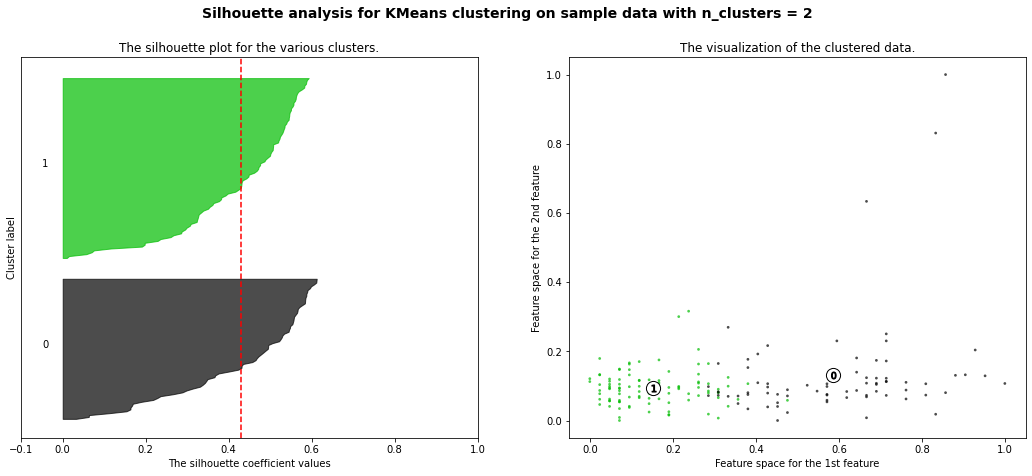

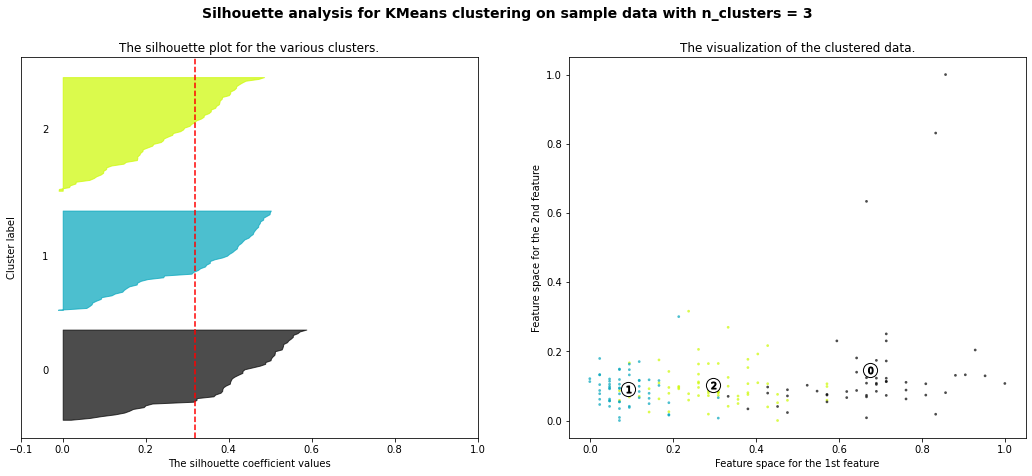

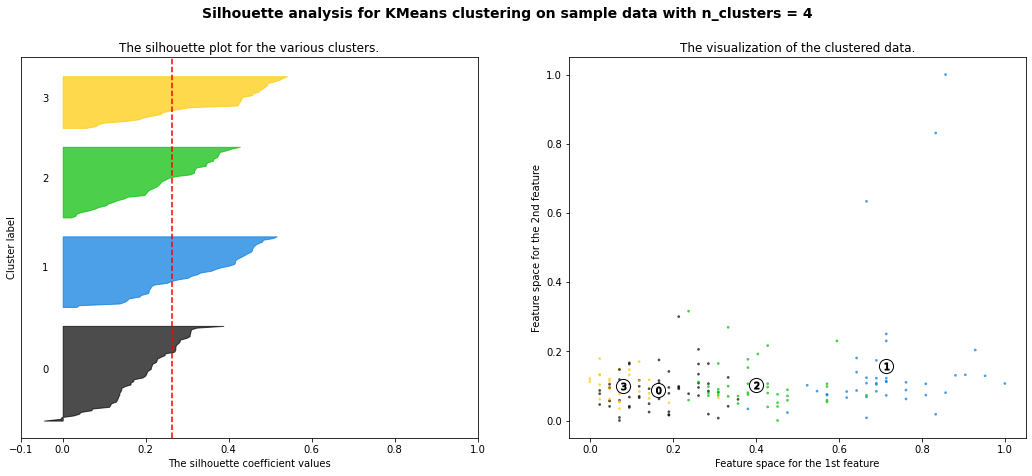

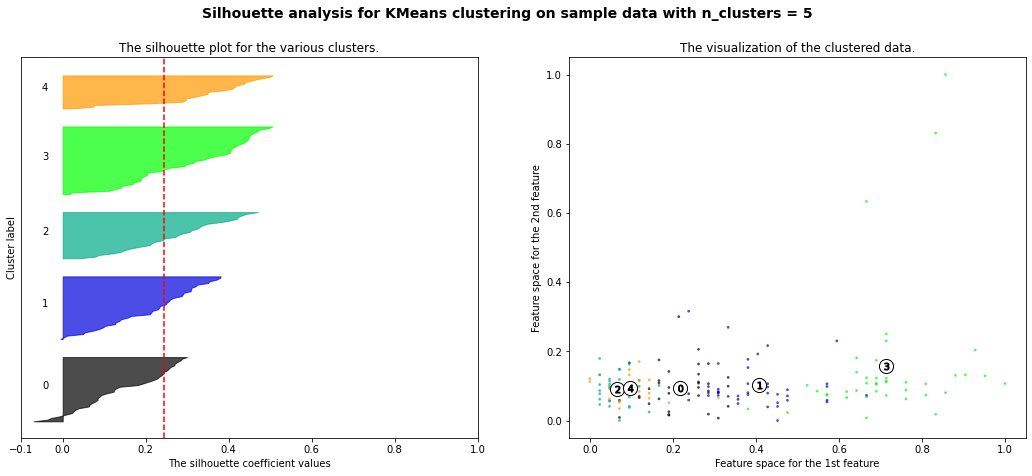

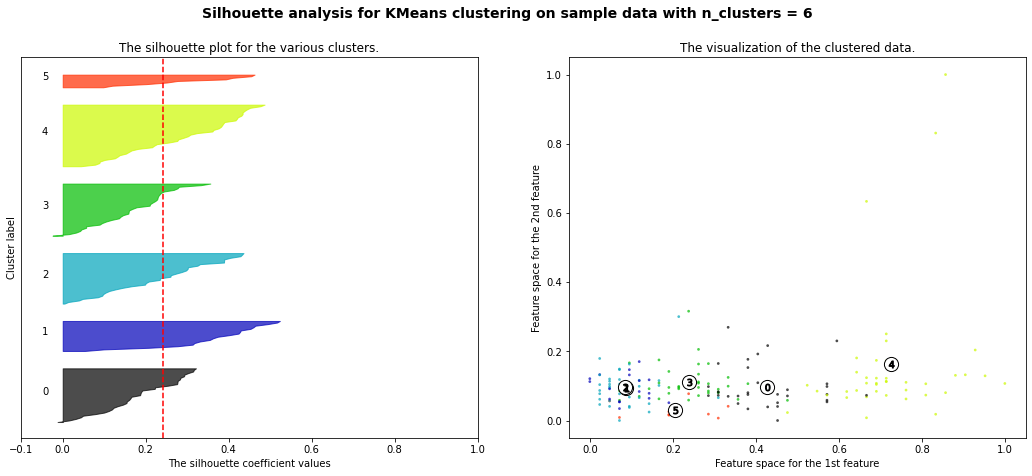

In [140]:
# Within cluster evaluation
range_n_clusters = [2, 3, 4, 5, 6]
for n_clusters in range_n_clusters:
    
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)
    ax1.set_xlim([-0.1, 1])
    ax1.set_ylim([0, len(data) + (n_clusters + 1) * 10])
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(data)
    silhouette_avg = silhouette_score(data, cluster_labels)
    print(
        "For n_clusters =",
        n_clusters,
        "The average silhouette_score is :",
        silhouette_avg,
    )
    sample_silhouette_values = silhouette_samples(data, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]
        ith_cluster_silhouette_values.sort()
        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i
        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(
            np.arange(y_lower, y_upper),
            0,
            ith_cluster_silhouette_values,
            facecolor=color,
            edgecolor=color,
            alpha=0.7,
        )
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
        y_lower = y_upper + 10  

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(
        data[:, 0], data[:, 1], marker=".", s=30, lw=0, alpha=0.7, c=colors, edgecolor="k"
    )
    centers = clusterer.cluster_centers_
    ax2.scatter(
        centers[:, 0],
        centers[:, 1],
        marker="o",
        c="white",
        alpha=1,
        s=200,
        edgecolor="k",
    )

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker="$%d$" % i, alpha=1, s=50, edgecolor="k")

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(
        "Silhouette analysis for KMeans clustering on sample data with n_clusters = %d"
        % n_clusters,
        fontsize=14,
        fontweight="bold",
    )
plt.show()

KMeans Clustering

The value of silhouette_score is highest for clusters=2. Therefore taking 2 cluster to train the dataset.

In [141]:
#KMeans Model
model_k=KMeans(n_clusters=2)
model_k.fit(data)
df_temp['KMeans Prediction']=model_k.labels_

Hierarchical Clustering

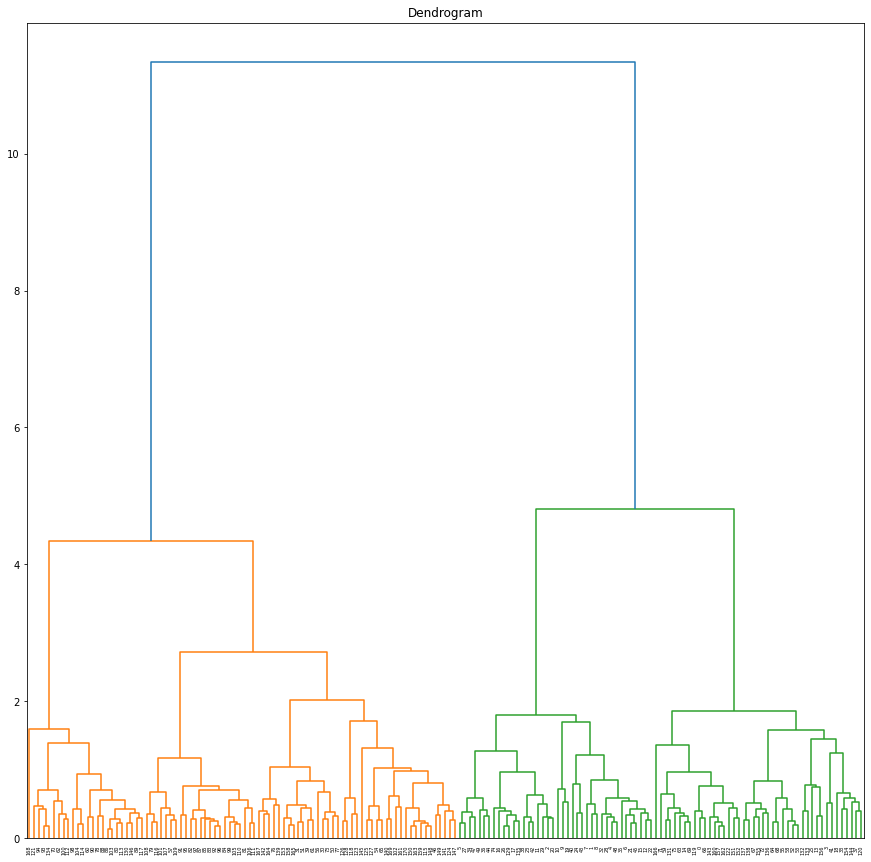

In [142]:
# Dendrogram
plt.figure(figsize=(15,15))  
plt.title("Dendrogram")  
dendrogram=shc.dendrogram(shc.linkage(data,method='ward'))

The dendrogram suggests 2 cluster for the dataset. Therefore going with n_clusters=2

In [143]:
# Hierarchical Clustering
model_h = AgglomerativeClustering(n_clusters=2, linkage='ward')  
model_h.fit_predict(data)
df_temp['Hierarchical Prediction']=model_h.labels_

Evaluation: CH ratio and Dunn Index values

In [144]:
df_temp

,Birth Rate,Business Tax Rate,Days to Start Business,GDP,Health Exp % GDP,Health Exp/Capita,Hours to do Tax,Infant Mortality Rate,Internet Usage,Life Expectancy Female,Life Expectancy Male,Mobile Phone Usage,Population 0-14,Population 15-64,Population 65+,Population Urban,Region,Country,KMeans Prediction,Hierarchical Prediction
0,0.025,72.0,25.0,1.990709e+11,0.044,233.0,451.0,0.023,0.1,72.0,69.0,0.9,0.272,0.681,0.047,0.682,Africa,Algeria,1,0
1,0.046,52.1,66.0,1.041159e+11,0.034,178.0,282.0,0.107,0.1,53.0,50.0,0.5,0.477,0.499,0.024,0.409,Africa,Angola,1,0
2,0.037,65.9,29.0,7.294900e+09,0.045,34.0,270.0,0.060,0.0,60.0,58.0,0.8,0.432,0.539,0.029,0.423,Africa,Benin,1,0
3,0.024,19.5,60.0,1.529242e+10,0.052,404.0,152.0,0.039,0.1,46.0,47.0,1.5,0.340,0.625,0.035,0.565,Africa,Botswana,1,0
4,0.042,43.5,13.0,1.039576e+10,0.064,39.0,270.0,0.068,0.0,56.0,55.0,0.5,0.458,0.517,0.025,0.265,Africa,Burkina Faso,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
201,0.018,27.9,694.0,4.363219e+09,0.060,490.0,199.0,0.022,0.3,74.0,67.0,1.0,0.283,0.652,0.065,0.663,The Americas,Suriname,0,0
202,0.015,29.1,41.0,2.367635e+10,0.053,935.0,210.0,0.020,0.6,73.0,66.0,1.4,0.207,0.708,0.085,0.089,The Americas,Trinidad and Tobago,0,1
204,0.013,46.5,5.0,1.553380e+13,0.177,8467.0,187.0,0.006,0.7,81.0,76.0,0.9,0.197,0.669,0.133,0.809,The Americas,United States,0,1
205,0.015,41.9,7.0,4.723671e+10,0.088,1213.0,336.0,0.010,0.5,80.0,73.0,1.4,0.223,0.638,0.139,0.946,The Americas,Uruguay,0,1


In [145]:
print('Kmeans CH Score: '+ str(metrics.calinski_harabasz_score(data, model_k.labels_)))
print('Hierarchical CH Score: '+ str(metrics.calinski_harabasz_score(data, model_h.labels_)))
print('Kmeans SH Score: '+ str(metrics.silhouette_score(data, model_k.labels_)))
print('Hierarchical SH Score: '+ str(metrics.silhouette_score(data, model_h.labels_)))

Kmeans CH Score: 192.54525050508803
Hierarchical CH Score: 184.87996192103543
Kmeans SH Score: 0.42987453131766545
Hierarchical SH Score: 0.4176400922367597


In [146]:
df_temp[['Country','KMeans Prediction']].sort_values(by='KMeans Prediction')

,Country,KMeans Prediction
96,Czech Republic,0
114,"Macedonia, FYR",0
115,Malta,0
116,Moldova,0
118,Montenegro,0
...,...,...
41,Sierra Leone,1
43,South Africa,1
45,Sudan,1
35,Niger,1


Conclusion:

We used the Silhoutte Score and Calinski Harabasz Score as a metric to compare the two models. KMeans suggests that 2 clusters should be made and Hierarchical suggests 2. Going by the Silhouette Score , we can conclude that Kmeans Clustering outperforms Hierarchical model. Hence we move ahead with Kmeans Clustering.

1.Silhouette Score Formula

Silhouette Score = (b-a)/max(a,b)

a= average intra-cluster distance i.e the average distance between each point within a cluster.

b= average inter-cluster distance i.e the average distance between all clusters.

Calinski Harabasz Score

CH(k)=[B(k)/W(k)]×[(n−k)/(k−1)]

where n =  data points k =  clusters W(k) = within cluster variation B(k) = between cluster variation.


##Scatter Plots

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



Text(0.5, 1.0, 'Infant Mortality Rate vs Internet Usage')

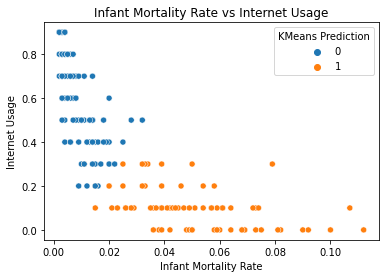

In [147]:
#Infant Mortality Rate VS Internet Usage
sns.scatterplot(df_temp['Infant Mortality Rate'],df_temp['Internet Usage'],hue=df_temp['KMeans Prediction'])
plt.title('Infant Mortality Rate vs Internet Usage')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



Text(0.5, 1.0, 'Birth Rate vs Internet Usage')

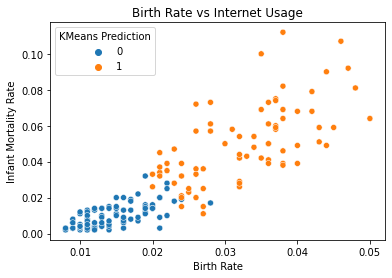

In [148]:
#Birth Rate VS Infant Mortality Rate
sns.scatterplot(df_temp['Birth Rate'],df_temp['Infant Mortality Rate'],hue=df_temp['KMeans Prediction'])
plt.title('Birth Rate vs Internet Usage')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



Text(0.5, 1.0, 'Population 0-14 vs Mobile Phone Usage')

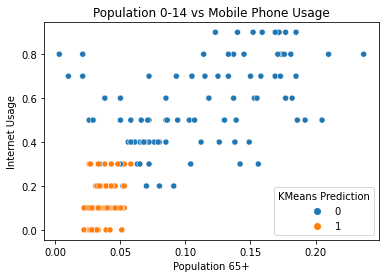

In [149]:
#Population 65+ VS Internet Usage
sns.scatterplot(df_temp['Population 65+'],df_temp['Internet Usage'],hue=df_temp['KMeans Prediction'])
plt.title('Population 0-14 vs Mobile Phone Usage')